<a href="https://colab.research.google.com/github/dwishashah/Machine-Learning/blob/main/ML_Exp1_LinearRegression_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR REGRESSION

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['figure.figsize']=(10,8)

Import data

In [ ]:
data = pd.read_csv('/content/foodtruck(1).txt')
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Visualising Data

Text(0.5, 1.0, 'Population Vs Profit')

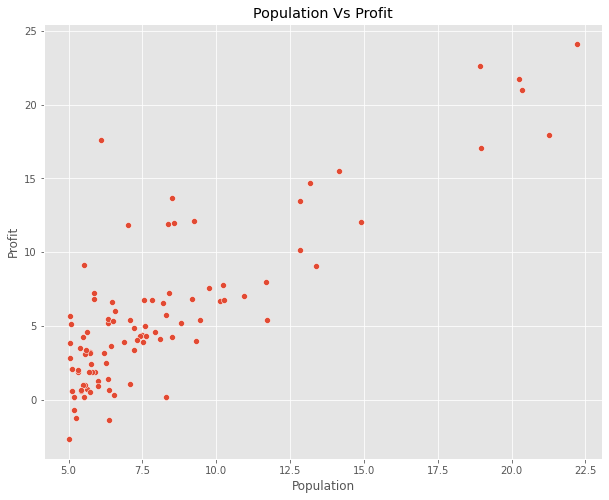

In [ ]:
ax = sns.scatterplot(x = "Population", y = "Profit", data = data)
ax.set_title("Population Vs Profit")

Compute Cost JTheta

In [ ]:
def cost_function(X, y, theta):
  m = len(y) #length of training
  y_pred = X.dot(theta) #dot prod
  error = (y_pred - y) ** 2 # sse

  return 1/ (2*m) * np.sum(error) # cost func

In [ ]:
m = data.Population.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape (m, 1)
theta = np.zeros((2, 1))

cost_function (X, y, theta)

32.072733877455676

Gradient Descent

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  costs =[]
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (y_pred - y))
    theta -= alpha * 1/m *error
    costs.append(cost_function(X, y, theta))
  return theta, costs

In [ ]:
theta, costs = gradient_descent(X, y, theta, alpha =0.01, iterations=1)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = 0.06 + 0.65x1


Visualising Cost Function

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])

    cost_values[i,j] = cost_function(X,y,t)
    

<ipython-input-33-c8d4d21a53c8>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection ='3d')


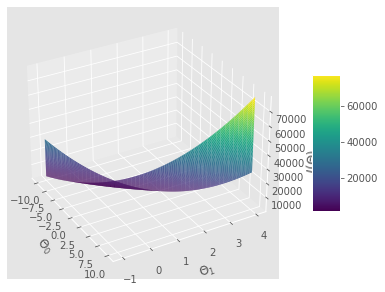

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.gca(projection ='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap ='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

ax.view_init(30, 330)

plt.show()

Plotting Convergence of JTheta

Text(0.5, 1.0, 'Values of cost function over iterations of gradient descent')

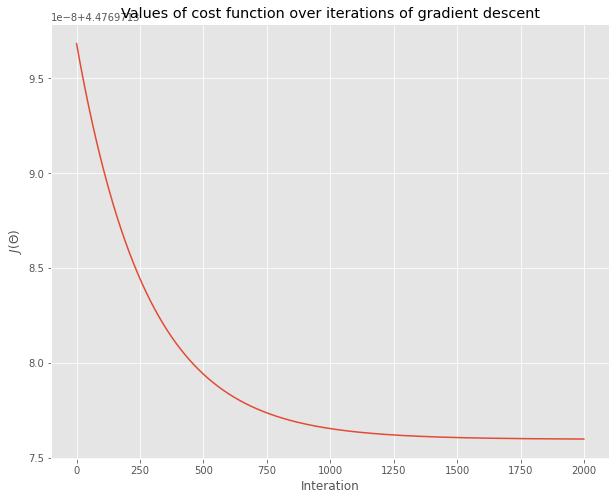

In [ ]:
theta, costs = gradient_descent(X, y, theta, alpha =0.01, iterations=2000)
plt.plot(costs)
plt.xlabel("Interation")
plt.ylabel("$J(\Theta)$")
plt.title("Values of cost function over iterations of gradient descent")


Training Data with Linear regression fit

In [ ]:
theta.shape
theta

array([[-3.89576789],
       [ 1.19303234]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


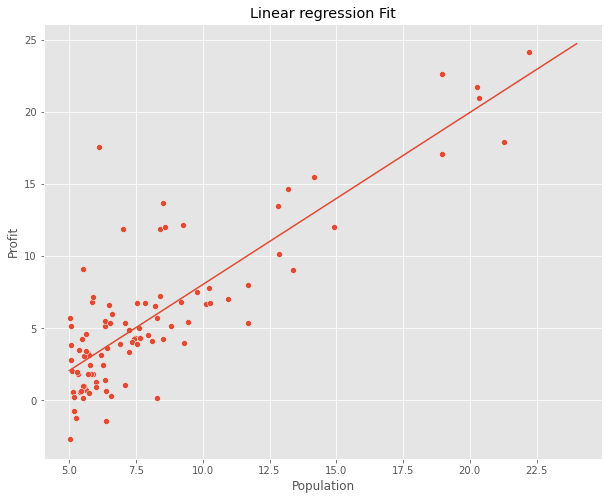

In [ ]:
theta = np.squeeze(theta)

sns.scatterplot(x = "Population", y = "Profit", data = data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]

sns.lineplot(x_value, y_value)

plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Linear regression Fit");



Inference using the optimized theta value


In [ ]:
def predict(x, theta):
  y_pred = np.dot(theta.transpose(), x)
  return y_pred

In [ ]:
y_pred_1 = predict(np.array([1, 4]), theta)*10000
y_pred_1



8763.614694551437

In [ ]:
y_pred_2 = predict(np.array([1, 8.3]), theta)*10000
y_pred_2

60064.00527339748